### Importing Libraries

In [241]:
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns 
import json
sns.set_style('darkgrid')

### Concatinating all the genre dataframes into one

In [242]:
files = ['data/'+i for i in os.listdir('data')]
main_df = []
for i in os.listdir('data'):
    data =  pd.read_csv(f'data/{i}')
    main_genre =  i.split('.')[0].capitalize()
    data['main_genre'] = main_genre
    main_df.append(data)

movies = pd.concat(main_df)


In [243]:
movies.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $),main_genre
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN,Action
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN,Action
2,tt5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN,Action
3,tt6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,NaN,Action
4,tt5433140,Fast X,2023,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,NaN,Action


### Duplicate Values

In [244]:
movies.shape

(298975, 15)

In [245]:
movies.duplicated(subset='movie_name').sum()

124117

In [246]:
movies = movies.drop_duplicates(subset='movie_name')

In [247]:
movies.shape

(174858, 15)

In [248]:
movies.duplicated().sum()

0

In [249]:
movies.shape

(174858, 15)

### Handling Null Values

In [250]:
movies.isnull().sum()

movie_id            0
movie_name          0
year            32271
certificate    135551
runtime         60296
genre               0
rating          75371
description         0
director        14703
director_id     14703
star            31247
star_id         27484
votes           75369
gross(in $)    166747
main_genre          0
dtype: int64

In [251]:
movies['certificate'].unique()

array(['PG-13', 'R', nan, 'Not Rated', 'TV-MA', 'PG', 'TV-14', '18+',
       'Approved', '13+', 'G', 'Unrated', 'M/PG', 'M', 'TV-PG', 'Passed',
       'TV-Y7', 'GP', 'TV-G', 'NC-17', '16+', 'X', 'TV-Y7-FV', 'TV-Y',
       '12', 'E', 'T', 'E10+', 'Open', 'TV-13', 'MA-13', 'AO', 'U', 'A',
       'MA-17', '18', 'UA', '13', 'UA 7+', 'UA 13+', '16', 'UA 16+'],
      dtype=object)

- Certificates that are Null can be replaced by 'Non Rated'

In [252]:
movies['certificate'].fillna('Not Rated', inplace=True)

In [253]:
movies['certificate'].isnull().sum()

0

In [254]:
movies.head(1)

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $),main_genre
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN,Action


In [255]:
movies['gross(in $)'].isnull().sum()

166747

- As majority of the data in gross column is null we will drop the gross columns and work on ratings

In [256]:
movies.drop('gross(in $)',axis =  1, inplace=True)

In [257]:
movies.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,main_genre
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,Action
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,Action
2,tt5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,Action
3,tt6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,Action
4,tt5433140,Fast X,2023,Not Rated,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,Action


In [258]:
movies.isnull().sum()

movie_id           0
movie_name         0
year           32271
certificate        0
runtime        60296
genre              0
rating         75371
description        0
director       14703
director_id    14703
star           31247
star_id        27484
votes          75369
main_genre         0
dtype: int64

- Removing all null values

In [259]:
movies.dropna(inplace=True)

In [260]:
movies.shape

(90617, 14)

In [261]:
movies.isnull().sum()

movie_id       0
movie_name     0
year           0
certificate    0
runtime        0
genre          0
rating         0
description    0
director       0
director_id    0
star           0
star_id        0
votes          0
main_genre     0
dtype: int64

In [262]:
movies = movies.reset_index(drop = True)

### Formatting Feature Data

In [263]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90617 entries, 0 to 90616
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_id     90617 non-null  object 
 1   movie_name   90617 non-null  object 
 2   year         90617 non-null  object 
 3   certificate  90617 non-null  object 
 4   runtime      90617 non-null  object 
 5   genre        90617 non-null  object 
 6   rating       90617 non-null  float64
 7   description  90617 non-null  object 
 8   director     90617 non-null  object 
 9   director_id  90617 non-null  object 
 10  star         90617 non-null  object 
 11  star_id      90617 non-null  object 
 12  votes        90617 non-null  float64
 13  main_genre   90617 non-null  object 
dtypes: float64(2), object(12)
memory usage: 9.7+ MB


In [264]:
movies.describe()

,rating,votes
count,90617.000000,9.061700e+04
mean,5.770457,7.901064e+03
std,1.341005,5.471597e+04
min,1.000000,5.000000e+00
25%,4.900000,3.700000e+01
50%,5.900000,1.560000e+02
75%,6.700000,8.620000e+02
max,10.000000,2.675531e+06


- movie_id

In [265]:
movies.head(1)['movie_id']

0    tt9114286
Name: movie_id, dtype: object

In [266]:
def filter_movie_id(data):
    return int(data[2:])

In [267]:
movies['movie_id'] =  movies['movie_id'].apply(filter_movie_id)

In [268]:
movies.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,main_genre
0,9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,Action
1,1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,Action
2,5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,Action
3,6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,Action
4,10954600,Ant-Man and the Wasp: Quantumania,2023,PG-13,125 min,"Action, Adventure, Comedy",6.6,"Scott Lang and Hope Van Dyne, along with Hank ...",Peyton Reed,/name/nm0715636/,"Paul Rudd, \nEvangeline Lilly, \nJonathan Majo...","/name/nm0748620/,/name/nm1431940/,/name/nm3718...",5396.0,Action


- runtime

In [269]:
def filter_runtime(data):
    return int(data.split(' ')[0].replace(',', ''))

In [270]:
movies['runtime'] =  movies['runtime'].apply(filter_runtime)

In [271]:
movies.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,main_genre
0,9114286,Black Panther: Wakanda Forever,2022,PG-13,161,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,Action
1,1630029,Avatar: The Way of Water,2022,PG-13,192,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,Action
2,5884796,Plane,2023,R,107,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,Action
3,6710474,Everything Everywhere All at Once,2022,R,139,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,Action
4,10954600,Ant-Man and the Wasp: Quantumania,2023,PG-13,125,"Action, Adventure, Comedy",6.6,"Scott Lang and Hope Van Dyne, along with Hank ...",Peyton Reed,/name/nm0715636/,"Paul Rudd, \nEvangeline Lilly, \nJonathan Majo...","/name/nm0748620/,/name/nm1431940/,/name/nm3718...",5396.0,Action


- genre

In [272]:
def filter_genre(data):
    return data.split(',')

In [273]:
movies['genre'] =  movies['genre'].apply(filter_genre)

In [274]:
movies.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,main_genre
0,9114286,Black Panther: Wakanda Forever,2022,PG-13,161,"[Action, Adventure, Drama]",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,Action
1,1630029,Avatar: The Way of Water,2022,PG-13,192,"[Action, Adventure, Fantasy]",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,Action
2,5884796,Plane,2023,R,107,"[Action, Thriller]",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,Action
3,6710474,Everything Everywhere All at Once,2022,R,139,"[Action, Adventure, Comedy]",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,Action
4,10954600,Ant-Man and the Wasp: Quantumania,2023,PG-13,125,"[Action, Adventure, Comedy]",6.6,"Scott Lang and Hope Van Dyne, along with Hank ...",Peyton Reed,/name/nm0715636/,"Paul Rudd, \nEvangeline Lilly, \nJonathan Majo...","/name/nm0748620/,/name/nm1431940/,/name/nm3718...",5396.0,Action


- director

In [275]:
def filter_director(data):
    return ' - '.join(data.replace(' \n', '').split(','))

In [276]:
movies['director'] =  movies['director'].apply(filter_director)

In [277]:
movies.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,main_genre
0,9114286,Black Panther: Wakanda Forever,2022,PG-13,161,"[Action, Adventure, Drama]",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,Action
1,1630029,Avatar: The Way of Water,2022,PG-13,192,"[Action, Adventure, Fantasy]",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,Action
2,5884796,Plane,2023,R,107,"[Action, Thriller]",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,Action
3,6710474,Everything Everywhere All at Once,2022,R,139,"[Action, Adventure, Comedy]",8.0,A middle-aged Chinese immigrant is swept up in...,Dan Kwan - Daniel Scheinert,/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,Action
4,10954600,Ant-Man and the Wasp: Quantumania,2023,PG-13,125,"[Action, Adventure, Comedy]",6.6,"Scott Lang and Hope Van Dyne, along with Hank ...",Peyton Reed,/name/nm0715636/,"Paul Rudd, \nEvangeline Lilly, \nJonathan Majo...","/name/nm0748620/,/name/nm1431940/,/name/nm3718...",5396.0,Action


- director_id

In [278]:
def filter_directorid(data):
    return int(re.findall('\d+', data)[0])

In [279]:
movies['director_id'] =  movies['director_id'].apply(filter_directorid)

In [280]:
movies.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,main_genre
0,9114286,Black Panther: Wakanda Forever,2022,PG-13,161,"[Action, Adventure, Drama]",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,3363032,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,Action
1,1630029,Avatar: The Way of Water,2022,PG-13,192,"[Action, Adventure, Fantasy]",7.8,Jake Sully lives with his newfound family form...,James Cameron,116,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,Action
2,5884796,Plane,2023,R,107,"[Action, Thriller]",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,724938,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,Action
3,6710474,Everything Everywhere All at Once,2022,R,139,"[Action, Adventure, Comedy]",8.0,A middle-aged Chinese immigrant is swept up in...,Dan Kwan - Daniel Scheinert,3453283,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,Action
4,10954600,Ant-Man and the Wasp: Quantumania,2023,PG-13,125,"[Action, Adventure, Comedy]",6.6,"Scott Lang and Hope Van Dyne, along with Hank ...",Peyton Reed,715636,"Paul Rudd, \nEvangeline Lilly, \nJonathan Majo...","/name/nm0748620/,/name/nm1431940/,/name/nm3718...",5396.0,Action


- star

In [281]:
def filter_star(data):
    return data.replace(' \n', '').split(',')

In [282]:
movies['star'] = movies['star'].apply(filter_star)

In [283]:
movies.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,main_genre
0,9114286,Black Panther: Wakanda Forever,2022,PG-13,161,"[Action, Adventure, Drama]",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,3363032,"[Letitia Wright, Lupita Nyong'o, Danai Gurira,...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,Action
1,1630029,Avatar: The Way of Water,2022,PG-13,192,"[Action, Adventure, Fantasy]",7.8,Jake Sully lives with his newfound family form...,James Cameron,116,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,Action
2,5884796,Plane,2023,R,107,"[Action, Thriller]",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,724938,"[Gerard Butler, Mike Colter, Tony Goldwyn, Yos...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,Action
3,6710474,Everything Everywhere All at Once,2022,R,139,"[Action, Adventure, Comedy]",8.0,A middle-aged Chinese immigrant is swept up in...,Dan Kwan - Daniel Scheinert,3453283,"[Michelle Yeoh, Stephanie Hsu, Jamie Lee Curti...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,Action
4,10954600,Ant-Man and the Wasp: Quantumania,2023,PG-13,125,"[Action, Adventure, Comedy]",6.6,"Scott Lang and Hope Van Dyne, along with Hank ...",Peyton Reed,715636,"[Paul Rudd, Evangeline Lilly, Jonathan Majors,...","/name/nm0748620/,/name/nm1431940/,/name/nm3718...",5396.0,Action


In [284]:
movies['star'][0]

['Letitia Wright', "Lupita Nyong'o", 'Danai Gurira', 'Winston Duke']

- star_id

In [285]:
def filter_starid(data):
    return [int(re.findall('\d+', i)[0]) for i in data.split(',')]

In [286]:
movies['star_id'] = movies['star_id'].apply(filter_starid)

In [287]:
movies.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,main_genre
0,9114286,Black Panther: Wakanda Forever,2022,PG-13,161,"[Action, Adventure, Drama]",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,3363032,"[Letitia Wright, Lupita Nyong'o, Danai Gurira,...","[4004793, 2143282, 1775091, 6328300]",204835.0,Action
1,1630029,Avatar: The Way of Water,2022,PG-13,192,"[Action, Adventure, Fantasy]",7.8,Jake Sully lives with his newfound family form...,James Cameron,116,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[941777, 757855, 244, 2332]",295119.0,Action
2,5884796,Plane,2023,R,107,"[Action, Thriller]",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,724938,"[Gerard Butler, Mike Colter, Tony Goldwyn, Yos...","[124930, 1591496, 1282, 5256788]",26220.0,Action
3,6710474,Everything Everywhere All at Once,2022,R,139,"[Action, Adventure, Comedy]",8.0,A middle-aged Chinese immigrant is swept up in...,Dan Kwan - Daniel Scheinert,3453283,"[Michelle Yeoh, Stephanie Hsu, Jamie Lee Curti...","[3215397, 706, 3513533, 130, 702841]",327858.0,Action
4,10954600,Ant-Man and the Wasp: Quantumania,2023,PG-13,125,"[Action, Adventure, Comedy]",6.6,"Scott Lang and Hope Van Dyne, along with Hank ...",Peyton Reed,715636,"[Paul Rudd, Evangeline Lilly, Jonathan Majors,...","[748620, 1431940, 3718007, 1105980]",5396.0,Action


- votes

In [288]:
def filter_votes(data):
    return int(data)

In [289]:
movies['votes'] = movies['votes'].apply(filter_votes)

In [290]:
movies.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,main_genre
0,9114286,Black Panther: Wakanda Forever,2022,PG-13,161,"[Action, Adventure, Drama]",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,3363032,"[Letitia Wright, Lupita Nyong'o, Danai Gurira,...","[4004793, 2143282, 1775091, 6328300]",204835,Action
1,1630029,Avatar: The Way of Water,2022,PG-13,192,"[Action, Adventure, Fantasy]",7.8,Jake Sully lives with his newfound family form...,James Cameron,116,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[941777, 757855, 244, 2332]",295119,Action
2,5884796,Plane,2023,R,107,"[Action, Thriller]",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,724938,"[Gerard Butler, Mike Colter, Tony Goldwyn, Yos...","[124930, 1591496, 1282, 5256788]",26220,Action
3,6710474,Everything Everywhere All at Once,2022,R,139,"[Action, Adventure, Comedy]",8.0,A middle-aged Chinese immigrant is swept up in...,Dan Kwan - Daniel Scheinert,3453283,"[Michelle Yeoh, Stephanie Hsu, Jamie Lee Curti...","[3215397, 706, 3513533, 130, 702841]",327858,Action
4,10954600,Ant-Man and the Wasp: Quantumania,2023,PG-13,125,"[Action, Adventure, Comedy]",6.6,"Scott Lang and Hope Van Dyne, along with Hank ...",Peyton Reed,715636,"[Paul Rudd, Evangeline Lilly, Jonathan Majors,...","[748620, 1431940, 3718007, 1105980]",5396,Action


### Creating some new useful features

- lead_actor - The Lead Actor

In [291]:
def extract_main_data(data):
    return data[0]

In [292]:
movies['lead_actor'] = movies['star'].apply(extract_main_data)

- total_rating_as_per_votes - Product of average_rating and total votes

In [293]:
movies['total_rating_as_per_votes'] =  movies['votes'] * movies['rating']

### Certification that yields the highest rated films

In [294]:
movies.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,main_genre,lead_actor,total_rating_as_per_votes
0,9114286,Black Panther: Wakanda Forever,2022,PG-13,161,"[Action, Adventure, Drama]",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,3363032,"[Letitia Wright, Lupita Nyong'o, Danai Gurira,...","[4004793, 2143282, 1775091, 6328300]",204835,Action,Letitia Wright,1413361.5
1,1630029,Avatar: The Way of Water,2022,PG-13,192,"[Action, Adventure, Fantasy]",7.8,Jake Sully lives with his newfound family form...,James Cameron,116,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[941777, 757855, 244, 2332]",295119,Action,Sam Worthington,2301928.2
2,5884796,Plane,2023,R,107,"[Action, Thriller]",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,724938,"[Gerard Butler, Mike Colter, Tony Goldwyn, Yos...","[124930, 1591496, 1282, 5256788]",26220,Action,Gerard Butler,170430.0
3,6710474,Everything Everywhere All at Once,2022,R,139,"[Action, Adventure, Comedy]",8.0,A middle-aged Chinese immigrant is swept up in...,Dan Kwan - Daniel Scheinert,3453283,"[Michelle Yeoh, Stephanie Hsu, Jamie Lee Curti...","[3215397, 706, 3513533, 130, 702841]",327858,Action,Michelle Yeoh,2622864.0
4,10954600,Ant-Man and the Wasp: Quantumania,2023,PG-13,125,"[Action, Adventure, Comedy]",6.6,"Scott Lang and Hope Van Dyne, along with Hank ...",Peyton Reed,715636,"[Paul Rudd, Evangeline Lilly, Jonathan Majors,...","[748620, 1431940, 3718007, 1105980]",5396,Action,Paul Rudd,35613.6


In [295]:
certificates_rating = movies.groupby('certificate')['rating'].mean().sort_values(ascending=False)[1:][:10]

In [296]:
certificates_rating

certificate
UA 7+       7.950000
E10+        7.766667
13+         7.266667
MA-13       7.200000
13          7.060000
UA 13+      6.966667
A           6.930000
TV-Y7-FV    6.780000
U           6.754118
T           6.650000
Name: rating, dtype: float64

<AxesSubplot:ylabel='certificate'>

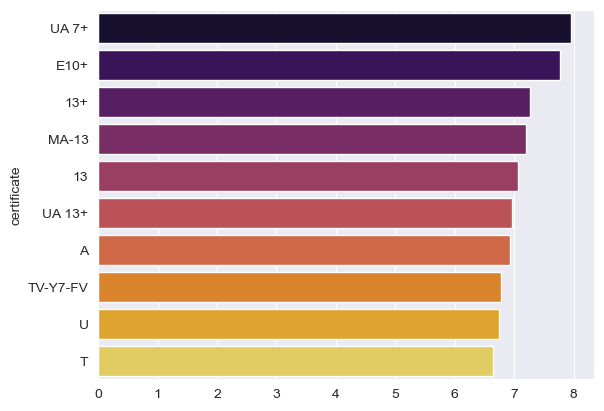

In [297]:
sns.barplot(x =  certificates_rating.values , y = certificates_rating.index, palette='inferno')

### Creating a json report of the top movies in each category based on the rating and votes

In [298]:
def get_top_movies(movies):
    for genre in movies['main_genre'].unique():
        report = {}
        data = movies[movies['main_genre'] == genre]
        result = data.groupby('movie_id')['total_rating_as_per_votes'].sum().sort_values(ascending = False)[:5]
        movie_data = []
        for idx in result.index:
            movie =  data[data['movie_id'] ==  idx]
            movie_data.append(movie)
        top_movies = pd.concat(movie_data)
        top_movies.drop('total_rating_as_per_votes',axis = 1, inplace = True)
        report[genre] = top_movies.to_dict(orient='record')
        with open(f'reports/{genre}.json' , 'w') as file:
            json.dump(report, file, indent = 4)

In [299]:
get_top_movies(movies)

C:\Users\User\AppData\Local\Temp\ipykernel_25876\2795265343.py:12: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  report[genre] = top_movies.to_dict(orient='record')


### Average runtime of movies from 2010-2020 using pivot.

In [312]:
avg_runtime = pd.pivot_table(data = movies,index = 'year', values='runtime', aggfunc='mean')[-15:-4]

In [313]:
avg_runtime

,runtime
year,
2010,96.589942
2011,95.532265
2012,95.237148
2013,96.292948
2014,97.164211
2015,97.358143
2016,97.390386
2017,97.822471
2018,98.523096
